# Домашняя работа №2

**Срок сдачи:** 21 октября 2017, 23:59 <br\>
Штраф за опоздание: -1 балл за каждый день

Файл с дз надо загрузить по [ссылке](https://www.dropbox.com/request/Sc8LELV7lp5Vl3Ad7wJG)<br/>
Постарайтесь назвать файл по следующему формату:** [ИАД-*{Номер}*] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br/>

Сопровождайте ваш код изображеними, комментариями и выводами. <br/>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Домашняя-работа-2" data-toc-modified-id="Домашняя-работа-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа 2</a></div><div class="lev2 toc-item"><a href="#Работа-с-данными-(4-балла)" data-toc-modified-id="Работа-с-данными-(4-балла)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Работа с данными (4 балла)</a></div><div class="lev2 toc-item"><a href="#Классификация-(6-баллов)" data-toc-modified-id="Классификация-(6-баллов)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Классификация (6 баллов)</a></div><div class="lev3 toc-item"><a href="#Предписания" data-toc-modified-id="Предписания-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Предписания</a></div><div class="lev3 toc-item"><a href="#Задание" data-toc-modified-id="Задание-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Задание</a></div>

Прочтите статью ["USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION"](https://www.dropbox.com/s/ww4h9ivnkbyy9xw/STUDENT%20ALCOHOL%20CONSUMPTION%20%281%29.pdf?dl=0).<br\>
Загрузите [датасет](https://cloud.mail.ru/public/KiKi/Cow8y2yn7), используемый в статье и выполните следующие задания:

## Работа с данными (4 балла)
1. Приведите описание признаков датасета на русском языке с указанием типа данных (2 балла)
2. Описание предобработки данных (2 балла)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (1 балл)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значением (1 балл)

In [921]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact

%matplotlib inline

In [922]:
pd.set_option('display.max_columns', 638)
pd.set_option('display.show_dimensions', True)

In [923]:
data = pd.read_csv('student/student-por.csv', sep=';')

Количество пропусков:

In [924]:
data.isnull().values.ravel().sum()

0

Выделение целевой переменной:

In [925]:
y = (5 * data['Dalc'] + 2 * data['Walc'])/7

In [926]:
y[y < 3] = 0

In [927]:
y[y >= 3] = 1

In [928]:
y.name = 'Alc'

In [929]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Alc, Length: 5, dtype: float64

In [930]:
X = data
X.drop(['Dalc', 'Walc'], axis = 1, inplace = True)

## Описание признаков

- 1 Школа студента
- 2 Пол
- 3 Возраст 
- 4 Адрес 
- 5 Размер семьи
- 6 Семейный статус родителей 
- 7 Образование матери 
- 8 Образование отца
- 9 Работа матери
- 10 Работа отца 
- 11 Причина выбора школы 
- 12 Попечитель 
- 13 Время пути до школы
- 14 Продолжительность занятий в неделю
- 15 Несдачи школьных предметов
- 16 Помощь в учебе
- 17 Помощь семье
- 18 Дополнительные занятия
- 19 Вне-учебные занятия
- 20 Посещал ли садик
- 21 Желание получить высшее образование
- 22 Доступ к интернету
- 23 Находится ли в отношениях
- 24 Критерий семейного благополучия
- 25 Свободное время от занятий
- 26 Времяпрепровождение с друзьями
- 27 Употребление алкоголя в будние дни
- 28 Употребление алкоголя по выходным
- 29 Здоровье
- 30 Пропуски
- 31 Оценка за португальский в 1 период
- 31 Оценка за португальский во 2 период
- 32 Финальная оценка за португальский

Тип данных по каждому признаку:

In [931]:
types = []
for column in X.columns:
    col_type = X[column].dtype
    types.append(col_type)
pd.DataFrame({'Column': X.columns, 'Type': types})

,Column,Type
0,school,object
1,sex,object
2,age,int64
3,address,object
4,famsize,object
5,Pstatus,object
6,Medu,int64
7,Fedu,int64
8,Mjob,object
9,Fjob,object


Бинарное кодирование absence, как в статье:

In [875]:
X.loc[X.absences < 10, 'absences'] = 0

In [876]:
X.loc[X.absences >= 10, 'absences'] = 1

In [877]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,0,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,0,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,3,0,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,5,0,11,13,13


In [878]:
X[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
   'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3']].corrwith(y, axis = 0)

age           0.139312
Medu         -0.019547
Fedu          0.004399
traveltime    0.105385
studytime    -0.126759
failures      0.116747
famrel       -0.044411
freetime      0.080210
goout         0.197454
health        0.045971
absences      0.138445
G1           -0.179089
G2           -0.166799
G3           -0.171620
Length: 14, dtype: float64

Хотя в выборке и есть признаки со слабой корреляцией с целевой переменной, далее оказалось, что нет большой разницы удалять их или нет.

Для бинарного кодирования признаков напишем функцию:

In [932]:
def transform_data(X):
    #номинальные признаки
    nom = X[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
             'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
             'absences']]
    #количественные
    num = X[['age', 'traveltime', 'failures',
             'goout', 'G1', 'G2', 'G3', 'Medu', 'Fedu', 'famrel', 'freetime', 'health']]
    
    return pd.concat((num, pd.get_dummies(nom)), axis=1)

In [933]:
X = transform_data(X)

In [934]:
X.head()

,age,traveltime,failures,goout,G1,G2,G3,Medu,Fedu,famrel,freetime,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,2,0,4,0,11,11,4,4,4,3,3,4,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,0,3,9,11,11,1,1,5,3,3,2,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,0,2,12,13,12,1,1,4,3,3,6,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,1,0,2,14,14,14,4,2,3,2,5,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,1,0,2,11,13,13,3,3,4,3,5,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


## Классификация (6 баллов)

### Предписания
- Используйте accuracy как основную меру качества
- Классы в задаче несбалансированные. Для корректной кросс-валидации используйте стратифицированный способ разбиения на фолды [Stratified K-fold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

### Задание
1. Задайте RANDOM_SEED и случайным образом разделите выборку на обучающую и контрольную в пропорции 80/20. Этот же RANDOM_SEED используйте при кросс-валидации (0.5 балла)
2. Random Forest (2 балла)
    * В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя.<br\>
    * Повторите эксперимент с использованием [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры с помощью кросс-валидации. (1 балл)<br\>
    * Изобразите аналогичную таблицу важности признаков для наилучшей настройки метода (значения могут отличаться). (0.5 балла)<br\>
    * Укажите значение accuracy для пяти наилучших настроек метода на контрольной выборке. (0.5 балла)<br\>

3. GradientBoosting (2 балла)
    * Обучите [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)<br\>
    * Изобразите таблицу важности признаков для наилучшей настройки метода. Отличается ли она от таблицы метода RandomForest. Почему? (1 балл)<br\>
    * Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)<br\>

4. AdaBoost (1 балл)
    * Обучите [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)<br\>
    * Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)<br\>

5. Какой из классификаторов оказался лучше? (0.5 балла)

In [882]:
from sklearn.model_selection import train_test_split

In [883]:
RANDOM_SEED = 64
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = RANDOM_SEED)

In [884]:
X_train.shape

(519, 56)

### Random Forest

In [935]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [936]:
rnd_forest = RandomForestClassifier()
params = {'n_estimators': np.arange(1,11),
          'max_depth': np.arange(1,11)} 
splits = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [937]:
rnd_forest_CV = GridSearchCV(estimator=rnd_forest, param_grid=params, 
                             scoring='accuracy', cv=splits)

In [938]:
rnd_forest_CV.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=64, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [939]:
rnd_forest_grid = pd.DataFrame(rnd_forest_CV.cv_results_)

In [940]:
rnd_forest_grid.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
65,0.008282,0.001002,0.885978,0.944143,7,6,"{'max_depth': 7, 'n_estimators': 6}",1,0.892308,0.951830,0.869231,0.936416,0.884615,0.940270,0.900000,0.944123,0.883721,0.948077,0.000507,0.000128,0.010246,0.005464
58,0.010447,0.001093,0.885978,0.925272,6,9,"{'max_depth': 6, 'n_estimators': 9}",1,0.884615,0.924855,0.884615,0.926782,0.892308,0.934489,0.876923,0.921002,0.891473,0.919231,0.000171,0.000094,0.005585,0.005332
37,0.009004,0.000951,0.885978,0.889445,4,8,"{'max_depth': 4, 'n_estimators': 8}",1,0.892308,0.892100,0.884615,0.886320,0.884615,0.888247,0.884615,0.890173,0.883721,0.890385,0.000213,0.000029,0.003186,0.001983
36,0.008064,0.000896,0.885978,0.894839,4,7,"{'max_depth': 4, 'n_estimators': 7}",1,0.884615,0.903661,0.884615,0.897881,0.884615,0.884393,0.884615,0.895954,0.891473,0.892308,0.000153,0.000029,0.002737,0.006385
0,0.002630,0.000637,0.884438,0.884438,1,1,"{'max_depth': 1, 'n_estimators': 1}",5,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.883721,0.884615,0.000272,0.000055,0.000357,0.000089
16,0.008063,0.000969,0.884438,0.884438,2,7,"{'max_depth': 2, 'n_estimators': 7}",5,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.883721,0.884615,0.000481,0.000087,0.000357,0.000089
1,0.003618,0.000761,0.884438,0.884438,1,2,"{'max_depth': 1, 'n_estimators': 2}",5,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.883721,0.884615,0.000201,0.000132,0.000357,0.000089
34,0.005941,0.000734,0.884438,0.893298,4,5,"{'max_depth': 4, 'n_estimators': 5}",5,0.884615,0.901734,0.884615,0.897881,0.884615,0.888247,0.884615,0.886320,0.883721,0.892308,0.000089,0.000006,0.000357,0.005785
28,0.009528,0.001017,0.884438,0.884823,3,9,"{'max_depth': 3, 'n_estimators': 9}",5,0.884615,0.884393,0.884615,0.884393,0.884615,0.886320,0.884615,0.884393,0.883721,0.884615,0.000020,0.000075,0.000357,0.000753
26,0.007673,0.000873,0.884438,0.885594,3,7,"{'max_depth': 3, 'n_estimators': 7}",5,0.884615,0.886320,0.884615,0.886320,0.884615,0.886320,0.884615,0.884393,0.883721,0.884615,0.000063,0.000029,0.000357,0.000892


Посмотрим, как меняется значение метрики с увеличением глубины деревьев:

In [941]:
def plot_interact(n_est):
    plt.plot(rnd_forest_grid[rnd_forest_grid['param_n_estimators'] == n_est]['param_max_depth'],
             rnd_forest_grid[rnd_forest_grid['param_n_estimators'] == n_est]['mean_test_score'])
    plt.xlabel('depth')
    plt.ylabel('accuracy')
    plt.ylim(0.5,1)
    plt.show()

In [942]:
from ipywidgets import IntSlider
from ipywidgets import interactive

In [943]:
interactive(plot_interact, n_est=IntSlider(min=1, max=10, value=1, step=1))

Найдем лучшую модель и веса признаков:

In [944]:
rnd_forest_CV.best_params_

{'max_depth': 4, 'n_estimators': 7}

In [945]:
best_model = RandomForestClassifier(max_depth = 5, n_estimators = 9)

In [946]:
pd.DataFrame({'columns': X.columns, 
              'weights': best_model.fit(X, y).feature_importances_}).sort_values('weights', 
                                                                                 ascending = False).head()

,columns,weights
12,absences,0.110693
16,sex_M,0.067143
6,G3,0.065503
3,goout,0.063576
5,G2,0.061263


Значения метрики для 5 лучших моделей:

In [947]:
for i in range(5):
    print(rnd_forest_grid.sort_values('mean_test_score', ascending = False).iloc[i].mean_test_score)

0.885978428351
0.885978428351
0.885978428351
0.885978428351
0.884437596302


Построим ROC кривую для лучшей модели, чтобы понять переобучается она или нет:

In [948]:
from sklearn.metrics import roc_curve

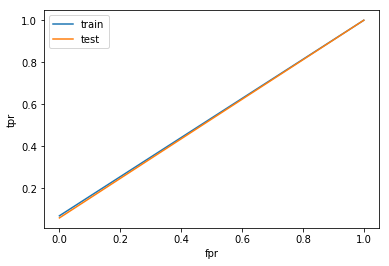

In [949]:
fpr_train, tpr_train, _ = roc_curve(y_train, best_model.predict(X_train))
plt.plot(fpr_train, tpr_train,  label = 'train')

fpr_test, tpr_test, _ = roc_curve(y_test, best_model.predict(X_test))
plt.plot(fpr_test, tpr_test, label = 'test')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

Судя по тому, что кривые для тестовой и контрольной выборки не сильно отличаются, модель наиболее вероятно не переобучается.

### Gradient Boosting

In [950]:
from sklearn.ensemble import GradientBoostingClassifier

In [951]:
GBC = GradientBoostingClassifier()
params = {'n_estimators': np.arange(1,11),
          'max_depth': np.arange(1,11),
          'learning_rate': np.arange(1,11)} 
splits = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [952]:
GBC_CV = GridSearchCV(estimator=GBC, param_grid=params, 
                             scoring='accuracy', cv=splits)

In [953]:
GBC_CV.fit(X, y)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:256: RuntimeWarning: overflow encountered in multiply
  * tree.value[:, 0, 0].take(terminal_regions, axis=0))
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:490: RuntimeWarning: invalid value enco

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=64, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'learning_rate': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [954]:
GBC_grid = pd.DataFrame(GBC_CV.cv_results_)
GBC_grid.sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.002438,0.000428,0.889060,0.887133,1,1,2,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",1,0.884615,0.884393,0.884615,0.884393,0.892308,0.892100,0.884615,0.884393,0.899225,0.890385,0.000128,2.726350e-05,0.005875,0.003399
3,0.004315,0.000522,0.887519,0.893296,1,1,4,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",2,0.892308,0.892100,0.876923,0.894027,0.876923,0.895954,0.900000,0.888247,0.891473,0.896154,0.001313,1.192671e-04,0.009159,0.002922
2,0.002938,0.000528,0.885978,0.889443,1,1,3,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",3,0.892308,0.886320,0.876923,0.895954,0.884615,0.884393,0.884615,0.884393,0.891473,0.896154,0.000115,9.174538e-05,0.005585,0.005444
4,0.004478,0.000649,0.885978,0.893682,1,1,5,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",3,0.884615,0.892100,0.876923,0.894027,0.884615,0.892100,0.900000,0.894027,0.883721,0.896154,0.000490,2.083224e-04,0.007587,0.001507
101,0.002143,0.000349,0.884438,0.884438,2,1,2,"{'learning_rate': 2, 'max_depth': 1, 'n_estima...",5,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.884615,0.884393,0.883721,0.884615,0.000023,4.712251e-06,0.000357,0.000089
11,0.003663,0.000426,0.882897,0.897149,1,2,2,"{'learning_rate': 1, 'max_depth': 2, 'n_estima...",6,0.900000,0.892100,0.876923,0.899807,0.876923,0.901734,0.861538,0.894027,0.899225,0.898077,0.001266,1.082034e-04,0.014740,0.003583
5,0.004097,0.000525,0.879815,0.899845,1,1,6,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",7,0.884615,0.899807,0.884615,0.897881,0.884615,0.897881,0.869231,0.901734,0.875969,0.901923,0.000552,1.130305e-04,0.006263,0.001767
7,0.004067,0.000451,0.879815,0.903313,1,1,8,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",7,0.876923,0.903661,0.900000,0.899807,0.853846,0.901734,0.892308,0.907514,0.875969,0.903846,0.000048,7.240031e-05,0.015893,0.002563
8,0.004409,0.000433,0.878274,0.904083,1,1,9,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",9,0.884615,0.901734,0.900000,0.899807,0.853846,0.905588,0.876923,0.909441,0.875969,0.903846,0.000082,1.108541e-05,0.014952,0.003311
6,0.003775,0.000410,0.876733,0.901771,1,1,7,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",10,0.876923,0.899807,0.884615,0.897881,0.853846,0.903661,0.884615,0.903661,0.883721,0.903846,0.000012,7.563545e-06,0.011812,0.002467


Найдем лучшую модель и веса признаков:

In [955]:
GBC_CV.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 2}

In [956]:
GBC_best_model = GradientBoostingClassifier(learning_rate = 1, max_depth = 1, n_estimators = 3)

In [957]:
pd.DataFrame({'columns': X.columns, 
              'weights': GBC_best_model.fit(X, y).feature_importances_}).sort_values('weights', 
                                                                                 ascending = False).head()

,columns,weights
12,absences,0.666667
16,sex_M,0.333333
0,age,0.000000
42,famsup_no,0.000000
31,Fjob_services,0.000000


Таблицы важности признаков отличаются, потому что наилучшими моделями random forest и gradient boosting оказались модели с разными параметрами.

Значения метрики для 5 лучших моделей:

In [958]:
for i in range(5):
    print(GBC_grid.sort_values('mean_test_score', ascending = False).iloc[i].mean_test_score)

0.88906009245
0.887519260401
0.885978428351
0.885978428351
0.884437596302


In [959]:
%%bash
say -v Daniel The programm execution has been finished

## AdaBoost

In [960]:
from sklearn.ensemble import AdaBoostClassifier

In [961]:
AdaBoost = AdaBoostClassifier()

In [962]:
AdaBoost = AdaBoostClassifier()
params = {'n_estimators': np.arange(1,11),
          'learning_rate': np.arange(1,11)} 
splits = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [963]:
AdaBoost_CV = GridSearchCV(estimator=AdaBoost, param_grid=params, 
                             scoring='accuracy', cv=splits)

In [964]:
AdaBoost_CV.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=64, shuffle=True),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'learning_rate': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [965]:
AdaBoost_grid=pd.DataFrame(AdaBoost_CV.cv_results_).sort_values('mean_test_score', ascending=False)
AdaBoost_grid.sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,0.007529,0.000766,0.895223,0.887903,1,5,"{'learning_rate': 1, 'n_estimators': 5}",1,0.915385,0.874759,0.915385,0.888247,0.876923,0.897881,0.876923,0.886320,0.891473,0.892308,0.000436,0.000064,0.017315,0.007673
5,0.009128,0.000794,0.890601,0.891371,1,6,"{'learning_rate': 1, 'n_estimators': 6}",2,0.900000,0.878613,0.907692,0.892100,0.861538,0.895954,0.900000,0.897881,0.883721,0.892308,0.000436,0.000022,0.016508,0.006746
3,0.005935,0.000624,0.890601,0.888676,1,4,"{'learning_rate': 1, 'n_estimators': 4}",2,0.900000,0.884393,0.915385,0.880539,0.861538,0.899807,0.892308,0.892100,0.883721,0.886538,0.000045,0.000014,0.017886,0.006704
2,0.004816,0.000564,0.889060,0.887519,1,3,"{'learning_rate': 1, 'n_estimators': 3}",4,0.900000,0.884393,0.915385,0.880539,0.861538,0.899807,0.884615,0.884393,0.883721,0.888462,0.000277,0.000028,0.018004,0.006635
6,0.011161,0.001033,0.887519,0.890216,1,7,"{'learning_rate': 1, 'n_estimators': 7}",5,0.907692,0.884393,0.907692,0.884393,0.853846,0.894027,0.884615,0.899807,0.883721,0.888462,0.000555,0.000355,0.019867,0.005957
1,0.003412,0.000503,0.887519,0.887522,1,2,"{'learning_rate': 1, 'n_estimators': 2}",5,0.869231,0.888247,0.923077,0.884393,0.861538,0.899807,0.884615,0.884393,0.899225,0.880769,0.000069,0.000059,0.022009,0.006582
7,0.012359,0.001355,0.885978,0.890216,1,8,"{'learning_rate': 1, 'n_estimators': 8}",7,0.892308,0.880539,0.915385,0.892100,0.853846,0.892100,0.892308,0.895954,0.875969,0.890385,0.000355,0.000378,0.020396,0.005171
50,0.002307,0.000436,0.884438,0.884439,6,1,"{'learning_rate': 6, 'n_estimators': 1}",8,0.869231,0.888247,0.900000,0.880539,0.869231,0.888247,0.884615,0.884393,0.899225,0.880769,0.000316,0.000067,0.013588,0.003396
86,0.008823,0.001001,0.884438,0.884439,9,7,"{'learning_rate': 9, 'n_estimators': 7}",8,0.869231,0.888247,0.900000,0.880539,0.869231,0.888247,0.884615,0.884393,0.899225,0.880769,0.000548,0.000225,0.013588,0.003396
88,0.016932,0.001476,0.884438,0.884439,9,9,"{'learning_rate': 9, 'n_estimators': 9}",8,0.869231,0.888247,0.900000,0.880539,0.869231,0.888247,0.884615,0.884393,0.899225,0.880769,0.000577,0.000291,0.013588,0.003396


Значения метрики для 5 лучших моделей:

In [966]:
for i in range(5):
    print(AdaBoost_grid.sort_values('mean_test_score', ascending = False).iloc[i].mean_test_score)

0.895223420647
0.890600924499
0.890600924499
0.88906009245
0.887519260401


Судя по значениям метрики, лучшей моделью оказался AdaBoostClasifier(learning_rate = 1, n_estimators = 5)